#Boussinesq Convection: Combining the Navier–Stokes and Advection–Diffusion equations

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

##Arhennius Laws

Non-dimensionalising a temperature-only Arhennius law is straightforward:

$$\eta = A \exp{\frac{E}{RT}}$$

$$\tilde T_r = \frac{T}{\triangle T}$$

We can then write $\tilde T_r$ as $\tilde T + \tilde T_0$, where $0 \geq \tilde T \geq 1$

$T_0$ is the surface temp, so $\tilde T_0$, is close to $\frac{273}{{\triangle T}}$.

$$\tilde T + \tilde T_0 = \frac{T}{\triangle T}$$


$$\tilde E = \frac{E}{R \triangle T}$$


$$\tilde \eta = \eta_{Arr} \exp{\frac{\tilde E}{\tilde T_0 + \tilde T}}$$


where the pre-factor $ \eta_{Arr}$ is chosen to ensure that the viscosity is equal to unity at $\tilde T = 1$ (or wherever the reference viscosity is set). Another way to normalize this is to subtract the value at the reference temperature (here, $T_0$, but could easily be anywhere in the domain)

$$\tilde \eta = \exp\left[{\frac{\tilde E}{\tilde T_0 + \tilde T} - \frac{\tilde E}{\tilde T_0 + \tilde T_0}} \right]$$


In [2]:
T = np.linspace(0,1,100)
T0 = 1
Ep1 = 11.
Ep2 = 23.
#Here, I'm using P_ref = D_ref = 0, i.e. reference depth / pressure is at the surface (at the MOR)

eta1 = [math.exp((Ep1/(i + T0)) - (Ep1/(T0 + T0) )) for i in T]
eta2 = [math.exp((Ep2/(i + T0)) - (Ep2/(T0 + T0) )) for i in T]
print(max(eta1)/min(eta1))
print(max(eta2)/min(eta2))
print(math.log(max(eta1)/min(eta1)))
print(math.log(max(eta2)/min(eta2)))


244.691932264
98715.7710108
5.5
11.5


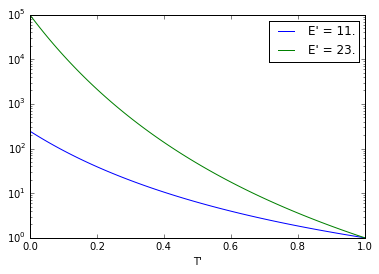

In [3]:
plt.plot(T, eta1, label = "E' = 11.")
plt.plot(T, eta2, label = "E' = 23.")
plt.legend()
plt.yscale('log')
plt.xlabel("T'")



With pressure, the relation is:

$$\eta = \eta_0\cdot \exp \left( \frac{E_{act} + pV_{act}}{RT} \right)$$


The following are dimensionless forms from the literature:

Christensen, "Convection with pressure- and temperature-dependent non-Newtonian rheology":


$$\eta = A \exp \left( \frac{E + (1-z)W}{T + T_0} \right)$$

And for the non-linear law:

$$\eta = (B/\dot\epsilon^{n-1})^{1/n} \exp \left( \frac{1}{n} \frac{E + (1-z)W}{T + T_0} \right)$$

With the Boussinesq-approximationpressure dependence is converted into simple depth dependence, now described by the dimensionless activation ‘volume’ W. Note that the $n$ exponent enters the exponetial term. 

The scaling factors are:

$$E(E*) = \frac{1}{R \triangle T}$$
$$W(W*) = \frac{\rho g h}{R \triangle T}$$

$$A = 1/\eta_0$$


From Ana-Catalina Plesa, et al., "Thermo-chemical Mantle Convection Simulations using Gaia", 
a non-dimensional form for the Arhennius law is:

$$\eta(\epsilon, T, p) = \left(\frac{\epsilon}{\epsilon_{ref}}\right)^{\frac{1-n}{n}} \exp \left(\frac{E + pV}{n(T + T_0)} - \frac{E + p_{ref}V}{n(T_{ref} + T_0)} \right) $$

Though I'm not sure about the $n$ term in the exponenatials, they aren't explained. I assume that $V$ and  $E$ in the above are still dimensional: i.e. they simply subtract a 'characteristic value' from the exponential term, which you can do because the total exponential term is by definition dimensionless.


Roberts and Zhong,"Degree-1 convection in the Martian mantle and the origin of the hemispheric dichotomy", a similar form is

$$\eta(T, z) = \eta(z)'\exp \left(\frac{E' + V'(1-z)}{T + T_s} - \frac{E + V'(1-D_s)}{1 + T_s} \right) $$

Here $\eta'(z)$ is a radial viscosity profile (e.g., layering) upon which the temperature- and pressure-dependence is superimposed. In this case $E'$, $V'$ are dimensionless, the scaling factors are given below. 

The dimensionless relationship requires normalization at the reference depth. This can obviously be written in two ways, either as a pre-exponential factor of an additional (subtracted) term in the exponential containing teh refernce temperature and pressure (or depth). These are equivalent. 

###Normalizing factors 

Here I try and work out the normalizing factors used in Crameri and Tackley, (they do not provide these). The follwoign factors are adapted from the discussion in Roberts and Zhong,"Degree-1 convection in the Martian mantle and the origin of the hemispheric dichotomy"


$$E' = \frac{E}{R \triangle T}$$

$$V' = \frac{\rho_0 g D V}{R \triangle T}$$

Roberts and Zhong give:

$$H' = \frac{H D^2}{\rho_0 C \triangle T \kappa_0} $$

where H is the internal heating rate measured as energy per time per volume. But for the Crameri example, we need, energy per time per kg:

$$H' = \frac{H D^2}{C \triangle T \kappa_0} $$


##Frank-Kamenetskii 

Starting with the dimensional form of T-only Arrhenius:

$$ \eta = A' \exp\frac{E}{RT}$$

Since convection mostly takes place in the interior of the cell where the temperature is close to the interior temperature $T_i$ , we use the same approximation by expanding the exponent $E/RT$ in the Arrhenius form so that the viscosity can be expressed as an exponential function of temperature only:

$$ \eta = B \exp(-\gamma T)$$

$$\gamma = \frac{E}{RT_i^2}$$


This method of expanding the terms in the exponent preserves the interior viscosity and the change of viscosity with temperature close to $T_i$ , where convection actively takes place. Some studies expanded the terms inside the exponents differently (e.g., King [2009]).

The dimensionless Arrhenius law is:

$$\tilde \eta = \eta_{Arr} \exp{\frac{\tilde E}{\tilde T_0 + \tilde T}}$$

And the corresponding FK approximation...

$$ \eta = \eta_{r,exp} \exp(-\theta T)$$

Where $\eta_{Arr}$, $\eta_{r,exp}$ are chosen to ensure that the viscosity is equal to unity at $T' = 1$

$$ \theta = \gamma \triangle T$$

In this case the viscosity contrast is  characterized by only one parameter ($\theta$):

$$\triangle \eta = e^{\theta}$$


###Fabio Crameri, and Paul J. Tackley 
####Parameters controlling dynamically self-consistent plate tectonics and single-sided subduction in global models of mantle convection
The assumed temperature-based Rayleigh number is $10^6$, 

the nondimensional internal heating rate is 20.0, which gives an internal heating-based Rayleigh number of $2.0 \times 10^7$.

In this paper they use the normalizing factors for activation energy volume, and replace these directly to give a dimensionless form of the Arhennius relationship:

$$\eta = \eta_0\cdot \exp \left( \frac{E_{act} + pV_{act}}{RT} \right)$$

Where the equation is either dimensional or non dimensionl, with the conversion given by appropriate scaling factors shown below. 

In the paper, they state $\eta_0$ is  set such that $\eta$ gives the reference viscosity at the characteristic Temperature and pressure. Crameri and Tackley use $T = 1600$ K and $p = 0$ Pa, e.g. viscosity at the midocean ridge. But $\eta_0$ is also called the reference viscosity.

In [4]:
D = 2890
E = 240 # kJ mol−1
R = 8.314 # m^3 mol
#Vact is the varied activation volume
V = 6.34*(10**-7)
#Nu0 is set such that Nu gives the reference viscosity at T = 1600 K and p = 0 Pa.
T = 1600
p = 0.0
delT = 2500
rho0 = 3300

#There is some confusion about the refernce visocisity //
# vs. the pre-exponential factor that sets the visocosty equal to the reference. 


Mu0 = 10**23 
Mu = Mu0*math.exp((E+p*V)/(R*T))

H = 5.44*10**(-12) #Internal heating
C = 1200 # Heat capacity J kg−1 K-1
k = 10**(-6) #Thermal diffusivity m2 s−1 
print "is this the reference viscosity: " "%.3g" % Mu 

Mu2 = (Mu0/math.exp((E+p*V)/(R*Tref)))
Mu = Mu2*math.exp((E+p*V)/(R*Tref))

#ie "set such that $\eta$ gives the reference viscosity at the characteristic Temperature and pressure."
print "or this: " "%.3g" % Mu2 + "?"
print "or this: " "%.3g" % Mu + "?"



is this the reference viscosity: 1.02e+23


NameError: name 'Tref' is not defined

In [ ]:
#Scaling factors for dimensionless values given in Crameri

#*1000 is KJ to J
print "E'= " + str(E*1000/(R*delT))

print "V'= " + str((rho0*9.81*V*(D*1000))/(R*delT))

print "H1'= " + str((H*(D*1000)**2)/(C*delT*k))

The dimensionless values are not exaclty what are published in Crameri and Tackley, e.g. V' is 3.0 not 2.8
This suggests that they used a slightly different scaling somewhere. But generally, these are close. 

In [ ]:
#Scaling the Arhennius parameters in Crameri, using the Christenson paper form

Ep = (E*1000)/(R*delT)
Ep2 = 23.03  #this is a value taken from Rolf and Tackley, see below...
Wp = rho0*9.81*V/R*delT
n0 = 1e23
Trf = 1600
delT = 2500
T0 = 0.5
p= rho0*10*(500*1000) #pressure at mid mantle
TrefP = 1600./2500

#A = n0/math.exp(E + p*V/R*T)
#math.exp(E + p*V/(R*T))
#print(E + p*V)
#print(R*T)
print(Ep,Ep2, Wp)

T = np.linspace(0,1,100)
z = np.linspace(0,1,100)

#Here, I'm using P_ref = D_ref = 0, i.e. reference depth / pressure is at the surface (at the MOR)

Nut0 = [math.exp(  (Ep + Wp*(1-0.0)/(i + T0))) for i in T]
Nut = [math.exp(  (Ep + Wp*(1-0.0)/(i + T0)) - (Ep + Wp*(1-0.0)/(TrefP + T0) )) for i in T]
Num = [math.exp(  (Ep + Wp*(1-0.5)/(i + T0)) - (Ep + Wp*(1-0.5)/(TrefP + T0) )) for i in T]
Nub = [math.exp(  (Ep + Wp*(1-1.0)/(i + T0)) - (Ep + Wp*(1-1.0)/(TrefP + T0) )) for i in T]
Nut2 = [math.exp((Ep2 + Wp*(1-0.0)/(i + T0)) - (Ep2 + Wp*(1-0.0)/(TrefP + T0) )) for i in T]



In [ ]:
max(Nut2)

In [ ]:
plt.plot(T, Nut0, label = "without norm.")
plt.plot(T, Nut, label = "top")
plt.plot(T, Num, label = "middle")
plt.plot(T, Nub, label = "bottom")
plt.plot(T, Nut2, label = "Ep = 23.03 ")
plt.axvline(TrefP )
plt.yscale('log')
plt.legend()

Still need to figure out why changing Ep value in above Figure has no effect.

In [ ]:
Ep = E*1000/(R*delT)
Vp = (rho0*9.81*V*D*1000)/(R*delT)
n0 = 1e23

In [ ]:
#Paramters from Moresi.

TC2K = 273.0           # Kelvin <--> degrees C
kappa = 1e-6           # Thermal diffusivity m^2/s
alpha = 3.0e-5         # Therml expansivity in /K

# Rheology (From Karato & Wu, 1993, assuming wet dislocation creep)

E0 = 240000                                 # Activation energy (J/mol)
mantleDensity = 3300
gravAcc = 10
V0 = mantleDensity*gravAcc*5.0e-6*1.0 # Activation Volume (m^3/mol) - then scale with approx lithostatic pressure 
R0 = 8.314                                  # Gas constant

##Dimensional scaling

The characteristic viscosity $\eta_0 $ is derived from the Rayleigh number $Ra_0$,assuming “realistic” values of all other parameters and given by

$$\eta_0 = \frac{\rho_0 \cdot g \cdot \alpha \cdot \triangle T \cdot D^3}{\kappa \cdot Ra_0}$$

Nondimensional times are dimensionalized using the thermal diffusion timescale

$$t_{diff} = \frac{D^2}{\kappa}$$

the stress scale $\triangle \sigma_1$ is

$$ \triangle \sigma_1= \eta_0 \frac{\kappa}{D^2}$$

An alternative stress scale $\triangle \sigma_2$ is

$$ \triangle \sigma_2= \frac{\rho g}{D}$$

the internal heating rate is dimensionalized using the heating scale:

$$ \triangle H = \frac{\kappa C p_0 \triangle T}{D^2}$$

##Yielding

In [ ]:
print(rho0,g,a,delT,D,k,Ra)

In [5]:
#Using the above stress scale,
Ra = 1e6
rho0=3300
delT = 2500
k = 1e-6
D = 2890
g = 9.8
a = 3e-5
eta0 = (rho0*g*a*delT*(D*1000)**3)/(k*Ra)
eta0 = 1e23
print(eta0)
stressscale  = (eta0*k)/((D*1000)**2)
stressscale2  =  rho0*g/D*1000
print(stressscale)
cohesion = 10e7 # 100 MPa
ndc1 = cohesion/stressscale
ndc2 = cohesion/stressscale2
print "this is the 1st dimensionless cohesion: " + str(ndc1)
print "this is the 2nd dimensionless cohesion: " + str(ndc2)

1e+23
11973.0367213
this is the 1st dimensionless cohesion: 8352.1
this is the 2nd dimensionless cohesion: 8936.30179344


In [29]:
#Lithostatic stress at 1000 km

typstress = 1e6*3300*10
typstress/stressscale

2756193.0000000005

The value for the dimensionless cohesion is about 8 times larger than the paper; although the paper does say "A limitation of all of these models is that the value of yield stress or friction coefficient (see equation (6)) necessary to obtain plate-like behavior is 0.5–1 order of magnitude smaller than that measured in laboratory experiments"so it ay be that the dimensional yield stress quoted is "measure", while the dimensionless one is has been reduced by a given factor. 

From Wong and Solomatov, "Towards scaling laws for subduction initiation on terrestrial planets: constraints from two-dimensional steady-state convection simulations".

The yield stress can be defined by Byerlee’s law

$$ \tau_y = \tau_0 + \mu\rho g z = \tau_0 + \mu P$$

 Above the yield stress, the deformation follows a plastic flow law defined by a non-linear effective viscosity:

$$ \eta_{eff} = \frac{\tau_y}{\dot e}$$

with $\dot e$ being the second invariant of the strain rate tensor

$\mu$ is dimensionless, but the combination $\mu P$ also needs to be divided by the stress scale. 

$$ \bar P = \frac{P D^2}{\eta_1 \kappa} = \frac{\rho_0 g z D^2}{\eta_1 \kappa}$$

Now we can substitute, $z = \bar z D$

$$  \bar P = \frac{\rho_0 g \bar z D^3}{\eta_1 \kappa} $$

The non-dimensional yield stress is as follows:

$$ \bar \tau_y = \bar \tau_0 + \bar \tau'_y \bar z $$

where

$$ \bar \tau_0 =\frac{d^2}{\kappa \eta_1} \tau_0 $$

is the non-dimensional yield stress at the surface and

$$\bar \tau'_y = \frac{\rho g d^3}{\kappa \eta_1} \mu$$

is the non-dimensional yield stress gradient



Note that the whole process here (following Wong and Solomatov) is quite different than the process for determinign the viscosity. There we substituted dimensional variables for non dimensional, $(\beta = \bar \beta \beta_s)$, and here we simply divide any dimensional quantites by a scaling factor. 

Commonly, convection simulations will use a dimensionless form where the hydrostatic pressure has beem scaled out of the system. In this case, the pressure scaling is;

$$ p= p_0 + (\eta \kappa / d^2) p'$$

See the notebook "Rayleigh numbers, for further information"

##Rheology with compositional fields

The viscosity h is given by an Arrhenius law toaccount for its temperature dependence in combination witha composition‐dependent pre‐factor for considering viscosity differences between continental and oceanic material:

$$ \eta_T(T,C) = \exp\left[ \ln(\triangle \eta_c C)\right] \cdot \exp \left[ \frac{\tilde E_A}{T + 1} - \frac{\tilde E_A}{2}\right]$$

Where $\triangle \eta_C$ and $E_A$ define the ratios $\eta(T,1)/\eta(T,0)$, and $\eta(1,C)/\eta(0,C)$ respectively...actually, it's $E = \ln \left(\eta(1,C)/\eta(0,C)\right)$

Note that the second term in the viscosity relationship, implies that the reference temperature is 1.

$E_A$ is set to 23.03, which allows for 5 orders of magnitude viscosity variation in the interval $0 ≤ T ≤ 1$. This is probably less than on Earth, but still allows for the formation of a rigid lid on top of the mantle.


The Rayleigh number in all cases is $10^6$ (based on a reference viscosity of $\eta_0= 10^{23} Pa\cdot s$),the internal heating rate $Q$ is 20.5 ($≈ 5×10^{−12} W\cdot kg^{−1}$), and the density difference between continental and normal mantle material is about −100 $kg\cdot m^{−3}$($R = −0.4$). 

In Yoshida, there is a separate viscosity function used, wherever the compositional field is greater than zero:

$$\eta_{CL}(C_{CL})=\exp\left[\left(\ln \eta^{max}_{CL}−\ln(\gamma \eta^{max}_{CL}) \right) C_{CL} + \ln(\gamma \eta^{max}_{CL})\right]$$
if $C_{CL} \geq C_{WCM} \gt 0 $

where 

$\eta^{max}_{CL}$ is the maximum viscosity of CL, and $\gamma $ is fixed at $10^{0.5}$.

This equation means that when CCL tends to zero $(C_{CL} > 0)$, $\eta_{CL}$ tends to $\gamma \eta^{max}_{CL}$, whereas when $C_{CL}$ is exactly zero (i.e., no tracer particle in FV), the viscosity is determined by Eq.  (6).

Also from Yoshida...

The CL and the WCM are less buoyant than the reference mantle and are assumed to have the same density contrast between them and the reference mantle, $200 kg \cdot m^{-3}$ on the basis of the geochemically estimated density of the subcontinental lithosphere ( Poudjom Djomani et al., 2001). The resultant values of $Ra_C$ are given in Table 1. 

It is not immediately clear whether by 'less buoyant' he means lighter or heavier, but the reference he points to ("The density structure of subcontinental lithosphere through time") states:

"we calculate mean densities at 20°C for Primitive Mantle (3.39 Mg m−3) and for SCLM of Archean (3.31±.016 Mg m−3), Proterozoic (3.35±0.02 Mg m−3) and Phanerozoic (3.36±0.02 Mg m−3) age"

And:

Proterozoic sections deeper than about 100 km thick also are significantly buoyant. The buoyancy of Archean and Proterozoic SCLM sections, combined with their refractory composition, leads to high viscosities and explains the longevity and stability of old SCLM. Replacement of Archean lithosphere, as beneath the present-day eastern Sino–Korean craton, probably involves mechanical dispersal by rifting, accompanied by the rise of hot, fertile asthenospheric material. Fertile Phanerozoic lithosphere is buoyant when the geotherm is sufficiently high, as in many Cenozoic volcanic provinces. However, as the geothermal gradient relaxes toward a stable conductive profile, Phanerozoic SCLM sections thinner than about 100 km become denser than the asthenosphere, and hence gravitationally unstable. 